## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
y = y.reshape(len(y), 1)

In [7]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [11]:
y = y.reshape(len(y))

In [12]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

## Training the data

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

svr.fit(X, y)

SVR()

In [14]:
sc_y.inverse_transform([svr.predict(sc_x.transform([[6.5]]))])

array([[170370.0204065]])

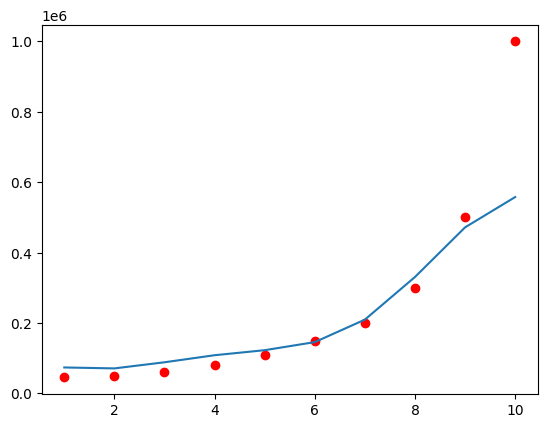

In [15]:
y_predict = (sc_y.inverse_transform(svr.predict(X).reshape(len(y), 1))).reshape(len(y))
plt.scatter(sc_x.inverse_transform(X), (sc_y.inverse_transform(y.reshape(len(y), 1))).reshape(len(y)), color="red")
plt.plot(sc_x.inverse_transform(X), y_predict)

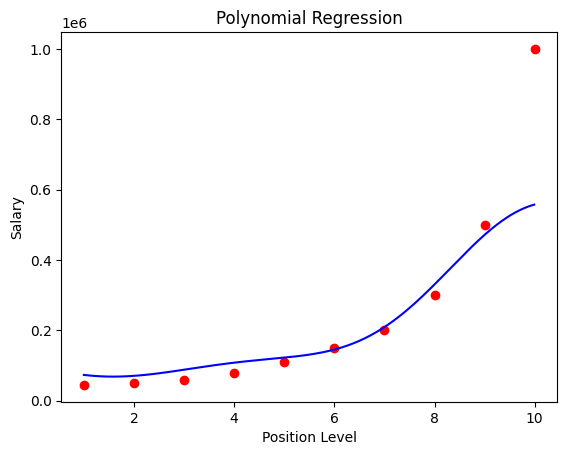

In [23]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_grid_predict = (sc_y.inverse_transform(svr.predict(sc_x.transform(X_grid)).reshape(len(X_grid), 1)))

plt.scatter(sc_x.inverse_transform(X), (sc_y.inverse_transform(y.reshape(len(y), 1))).reshape(len(y)), color="red")
plt.plot(X_grid, y_grid_predict, color="blue")
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()